In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import numpy as np
z_mean = np.load("TCR-Only Data/z_mean.npy")

In [ ]:
print(z_mean.shape)

(7965, 2)


In [ ]:
print(z_mean[0])

[-0.32749015  0.73723215]


[[7769, 884.0492642264275], [1348, 304.18244517296887], [367, 482.3670005457544], [7940, 33.907078007230325], [2824, 469.9129042201232]]
[[818, 774.6201751189715], [1348, 319.75904452235864], [367, 507.8774935283691], [7940, 21.7433589903045], [2824, 512.1885259965652]]
[[818, 766.6718339747729], [1348, 319.75904452235864], [367, 508.55111014772774], [7940, 19.05857491095886], [1338, 521.3255734551898]]
[[1610, 783.1343430678149], [1348, 336.7735342460962], [367, 505.58723532122804], [7940, 19.05857491095886], [1338, 483.01553436045515]]
[[1610, 786.7284717652695], [1348, 334.1659493482734], [367, 506.2983900198212], [7940, 20.373824842275127], [1338, 479.8269739203279]]
[[1610, 786.7284717652695], [1348, 334.1659493482734], [367, 506.2983900198212], [7940, 20.373824842275127], [1338, 479.8269739203279]]
[[1610, 786.7284717652695], [1348, 334.1659493482734], [367, 506.2983900198212], [7940, 20.373824842275127], [1338, 479.8269739203279]]
[[1610, 786.7284717652695], [1348, 334.165949348

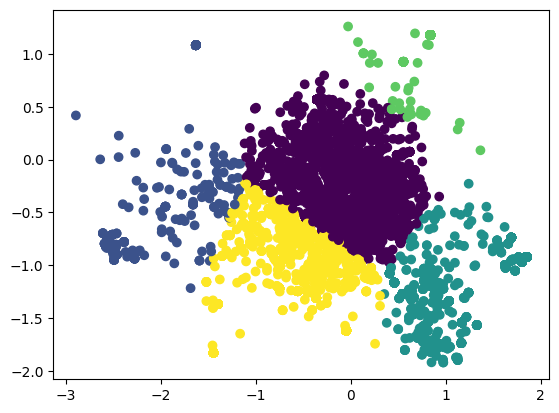

In [ ]:
import matplotlib.pyplot as plt
import random

def calculate_distance(a, b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

class kmediod():
    def __init__(self,npoints,ncenter):
        self.npoints=npoints
        self.ncenter=ncenter
        self.data=None
        
    def get_data(self, data):
        self.data = data

    def k_center(self):
        medoids = random.sample(range(self.npoints), self.ncenter)
        for repeat in range(10):
            label = []
            clusters = [[] for i in range(self.ncenter)]
            for point in range(self.npoints):
                min = float("inf")
                cluster = 0
                for medoid in range(len(medoids)):
                    distance = calculate_distance(self.data[point], self.data[medoids[medoid]])
                    if distance < min:
                        cluster = medoid
                        min = distance
                label.append(cluster)
                clusters[cluster].append(point)
            cluster_costs = [[0, float("inf")] for i in range(self.ncenter)]
            for point in range(self.npoints):
                cluster = label[point]
                total_cost = 0
                for cluster_point in clusters[cluster]:
                    total_cost += calculate_distance(self.data[point], self.data[cluster_point])
                if total_cost < cluster_costs[cluster][1]:
                    cluster_costs[cluster] = [point, total_cost]
            medoids = []
            print(cluster_costs)
            for cluster in cluster_costs:
                medoids.append(cluster[0])
        return np.array(label)
 
    def run(self, data):
        self.get_data(data)
        newlabel = self.k_center()
        plt.scatter(self.data[:, 0], self.data[:, 1], c=newlabel)
        plt.show()
        return(newlabel)
 
 
test = kmediod(npoints=len(z_mean), ncenter=5)
clusters = test.run(z_mean)
np.save("TCR-Only Data/clusters.npy", clusters)

In [1]:
import os
os.chdir("/content/drive/MyDrive")

In [2]:
import numpy as np
specificity = list(np.load("Preprocessed Data/specificity.npy"))
clusters = list(np.load("TCR-Only Data/clusters.npy"))

In [3]:
unique_specificity = list(set(specificity))
print(unique_specificity)

['A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 'A0201_ELAGIGILTV_MART-1_Cancer_binder', 'A0201_GILGFVFTL_Flu-MP_Influenza_binder', 'A0301_KLGGALQAK_IE-1_CMV_binder', 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder']


In [4]:
unique_clusters = list(set(clusters))
print(unique_clusters)

[0, 1, 2, 3, 4]


In [5]:
import itertools

perms = itertools.permutations(unique_specificity)

perms = list(perms)

In [6]:
for i in range(len(perms)):
  perms[i] = list(perms[i])

In [7]:
perms[0]

['A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
 'A0201_ELAGIGILTV_MART-1_Cancer_binder',
 'A0201_GILGFVFTL_Flu-MP_Influenza_binder',
 'A0301_KLGGALQAK_IE-1_CMV_binder',
 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder']

In [8]:
clusters[0 : 5]

[0, 2, 2, 2, 2]

In [9]:
import copy

accuracies = []
for perm in perms:
  y_pred = copy.deepcopy(clusters)
  y_test = specificity
  for i in range(len(y_pred)):
    y_pred[i] = perm[y_pred[i]]
  count = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
      count += 1
  accuracy = count / len(y_pred)
  accuracies.append(accuracy)

In [10]:
print(max(accuracies))
print(accuracies.index(max(accuracies)))

0.6539861895794099
80


In [13]:
print(perms[accuracies.index(max(accuracies))])

['A0301_KLGGALQAK_IE-1_CMV_binder', 'A0201_ELAGIGILTV_MART-1_Cancer_binder', 'A0201_GILGFVFTL_Flu-MP_Influenza_binder', 'A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder']


In [14]:
perm = perms[accuracies.index(max(accuracies))]
y_pred = copy.deepcopy(clusters)
y_test = specificity
for i in range(len(y_pred)):
  y_pred[i] = perm[y_pred[i]]
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1
accuracy = count / len(y_pred)
print(accuracy)

0.6539861895794099
